In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 16.0)

In [7]:
def cal_pivot_diff(input_df):
    date = input_df.iloc[0]['date_level'].split('_')[0]
    template = pd.DataFrame(index=[date], data=[[0,0,0,0]], columns=['below_pivot_stock', 'below_pivot_protion', \
                                                            'above_pivot_stock', 'above_pivot_protion'])
    reach_pivot = False
    for index, row in input_df.iterrows():
        if not reach_pivot:        
            template['below_pivot_stock'] = template['below_pivot_stock'] + int(row['stock number'].replace(',', ''))
            template['below_pivot_protion'] = template['below_pivot_protion'] + float(row['total portion'])
        else:
            template['above_pivot_stock'] = template['above_pivot_stock'] + int(row['stock number'].replace(',', ''))
            template['above_pivot_protion'] = template['above_pivot_protion'] + float(row['total portion'])

        level_array = row['date_level'].split('_')[1].replace(',', '').split('-')    
        if pivot in level_array:
            reach_pivot = True
    return template

stock_id = '2337'
pivot = "200000"
df = pd.read_csv('../tdcc/{}_tdcc.csv'.format(stock_id))
result_diff = None
data_num = len(df)/15
for x in range(0, data_num):
    output = cal_pivot_diff(df.loc[(x*15):(x+1)*15])
    result_diff = result_diff.append(output) if result_diff is not None else output
    
result_diff

,below_pivot_stock,below_pivot_protion,above_pivot_stock,above_pivot_protion
20170609,1416702877,38.55,2294469827,62.47
20170603,1412432046,38.42,2298445135,62.58
20170526,1452626422,39.52,2258160936,61.49
20170519,1480170585,40.26,2230588601,60.74
20170512,1500140426,40.81,2211711896,60.20
20170505,1508614649,41.05,2203254912,59.97
20170428,1519862636,41.34,2192073349,59.66
20170421,1526146773,41.51,2185796604,59.50
20170414,1543604666,42.00,2168296078,59.02
20170407,1566621496,42.62,2145236410,58.38


In [24]:
data_diff = pd.DataFrame(data=result_diff[['below_pivot_protion', 'above_pivot_protion']])
data_diff = data_diff.sort_index(ascending=True)
data.tail(20).plot.bar(stacked=True)
plt.show()

KeyError: "['below_pivot_protion' 'above_pivot_protion'] not in index"

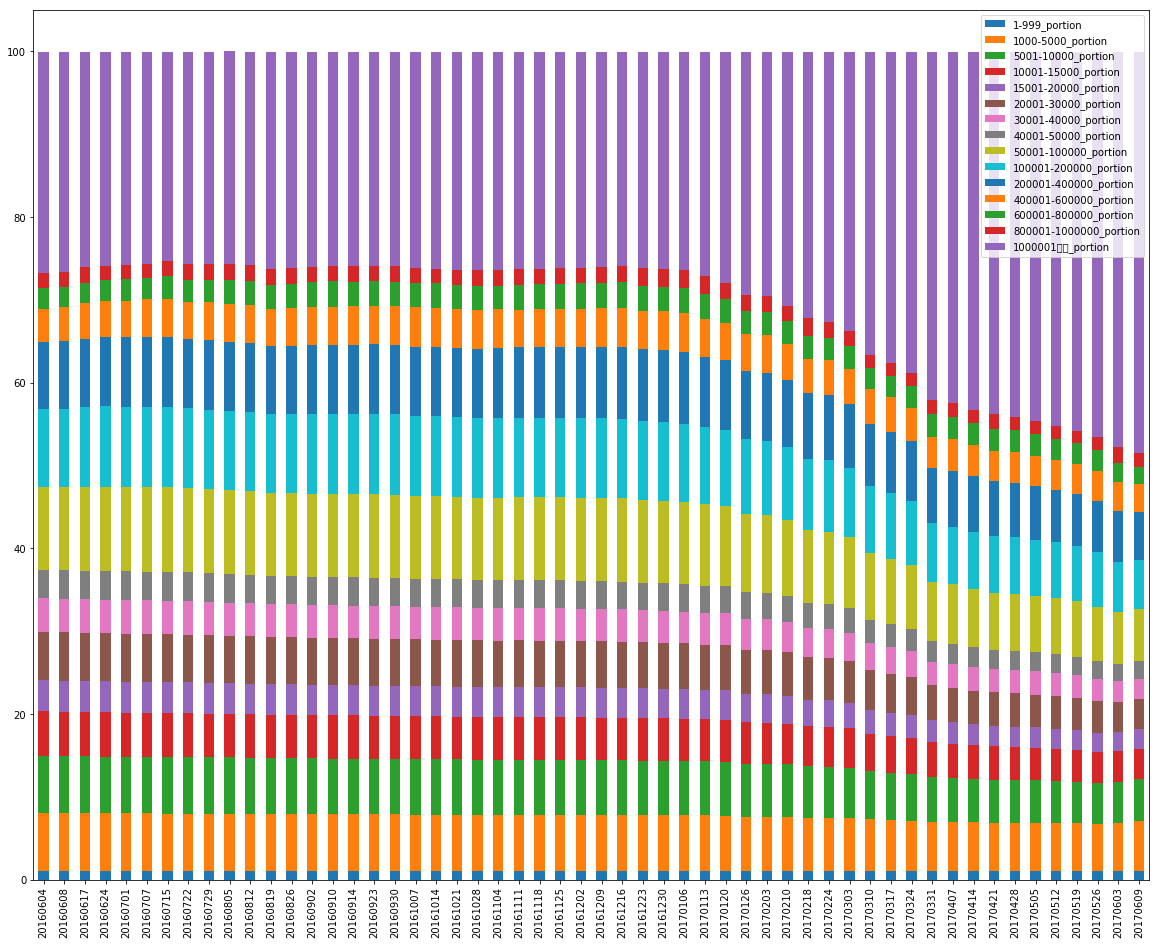

In [22]:
def get_level_data(input_df):
    date = input_df.iloc[0]['date_level'].split('_')[0]
    template = pd.DataFrame(index=[date])
    for index, row in input_df.iterrows():
        level = row['date_level'].split('_')[1].replace(',', '')
        template['{}_portion'.format(level)] = row['total portion']
    return template
get_level_data(df[:15])
result = None
data_num = len(df)/15
for x in range(0, data_num):
    output = get_level_data(df.loc[(x*15):(x+1)*15])
    result = result.append(output) if result is not None else output
result = result.sort_index()
result.plot.bar(stacked=True)
plt.show()